In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import datetime
%matplotlib inline

In [139]:
df = pd.read_csv('./data/Dubizzle_used_car_sales.csv')
df

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,26000,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,33000,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,AED7525month | 2015 Land Rover Range Rover Aut...,215000,105777,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,Left Hand Side,2015.0,White,Dubai,Autobiography,land-rover,range-rover,18/11/2021
9966,LOW MILEAGE Cadillac Escalade Platinum,90000,55640,Perfect inside and out,Perfect inside and out,Owner,SUV,8,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,White,Dubai,Platinum,cadillac,escalade,11/05/2022
9967,WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,679000,100,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,Other,400 - 500 HP,Gasoline,Left Hand Side,NaN,Black,Dubai,SVR,land-rover,range-rover-sport,14/12/2021
9968,Chevrolet Malibu GCC Spec,18900,140000,"No accidents, very few faults",Perfect inside and out,Owner,Sedan,4,Automatic Transmission,GCC Specs,150 - 200 HP,Gasoline,Left Hand Side,2013.0,White,Dubai,LS,chevrolet,malibu,06/03/2022


In [140]:
for i in df.columns:
    print(i, len(set(df[i])))

title 9170
price_in_aed 1426
kilometers 3874
body_condition 4
mechanical_condition 5
seller_type 3
body_type 13
no_of_cylinders 9
transmission_type 2
regional_specs 5
horsepower 11
fuel_type 4
steering_side 2
year 1022
color 17
emirate 16
motors_trim 857
company 73
model 552
date_posted 345


### 타이틀이 너무 난잡하고 뒤의 정보와 겹치는 부분이 많기 때문에 제거

In [141]:
df = df.drop("title", axis=1)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price_in_aed          9970 non-null   int64  
 1   kilometers            9970 non-null   int64  
 2   body_condition        9970 non-null   object 
 3   mechanical_condition  9970 non-null   object 
 4   seller_type           9970 non-null   object 
 5   body_type             9970 non-null   object 
 6   no_of_cylinders       9889 non-null   object 
 7   transmission_type     9970 non-null   object 
 8   regional_specs        9970 non-null   object 
 9   horsepower            9970 non-null   object 
 10  fuel_type             9970 non-null   object 
 11  steering_side         9970 non-null   object 
 12  year                  9000 non-null   float64
 13  color                 9970 non-null   object 
 14  emirate               9970 non-null   object 
 15  motors_trim          

In [143]:
df = df.dropna()

In [144]:
len(df)

8949

In [145]:
def chdt(data):
    return datetime.datetime.strptime(data.strftime("%Y-%m-%d"), "%Y-%m-%d")

In [146]:
df["date_posted"] = pd.to_datetime(df["date_posted"])
df["date_posted"] = df["date_posted"].apply(chdt)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18380\4056154445.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["date_posted"] = pd.to_datetime(df["date_posted"])


In [147]:
df.head(2)

,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,26000,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,2022-05-13
1,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,2022-01-14


In [148]:
type(df["body_type"].iloc[0])

str

### 범주의 변수의 값이 전부 string 으로 되어있기 때문에 int 형으로 변환

In [149]:
import re

complier = re.compile("[a-zA-Z]")

le = LabelEncoder()

for i in df.columns:
    if complier.search(str(df[i].iloc[0])):
        df[i] = le.fit_transform(df[i])

df

,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,26000,167390,3,4,0,6,6,0,1,10,2,0,2013.0,12,3,374,47,355,2022-05-13
1,110000,39000,3,4,0,6,8,0,3,3,2,0,2018.0,15,6,15,10,437,2022-01-14
2,78000,200000,3,4,0,7,6,0,1,3,2,0,2014.0,2,6,284,42,169,2022-05-05
3,899000,27000,3,4,0,2,8,0,1,5,2,0,2018.0,11,3,699,15,29,2022-04-30
4,33000,69000,3,4,2,12,4,1,1,9,2,0,2020.0,15,3,699,54,165,2022-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,225000,0,3,4,0,6,6,0,1,1,2,0,2021.0,15,3,487,30,242,2022-02-01
9965,215000,105777,3,4,0,6,8,0,1,4,2,0,2015.0,15,3,170,33,394,2021-11-18
9966,90000,55640,3,4,2,6,8,0,1,3,2,0,2014.0,15,3,532,8,185,2022-05-11
9968,18900,140000,1,4,2,7,4,0,1,0,2,0,2013.0,15,3,474,10,311,2022-03-06


### 각 차별 연식, 게시일 이 존재 각 차별 가격이 갱신이 되는지 확인

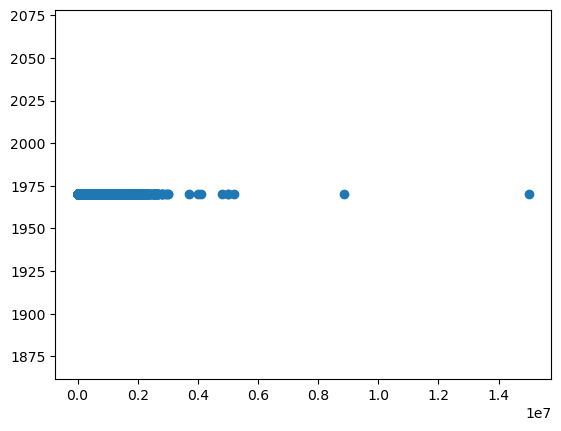

In [150]:
plt.scatter(df["price_in_aed"], pd.to_datetime(df["year"]).dt.year)
plt.show()

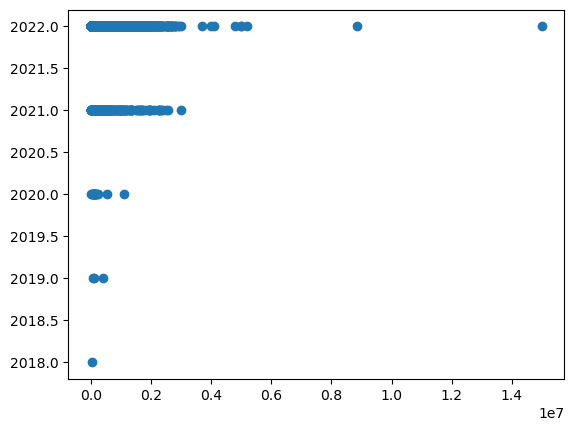

In [151]:
plt.scatter(df["price_in_aed"], df["date_posted"].dt.year)
plt.show()